In [2]:
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno

df = pd.read_csv("UsArrests.csv")

In [3]:
df.head()

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
df.shape

(50, 5)

<AxesSubplot: >

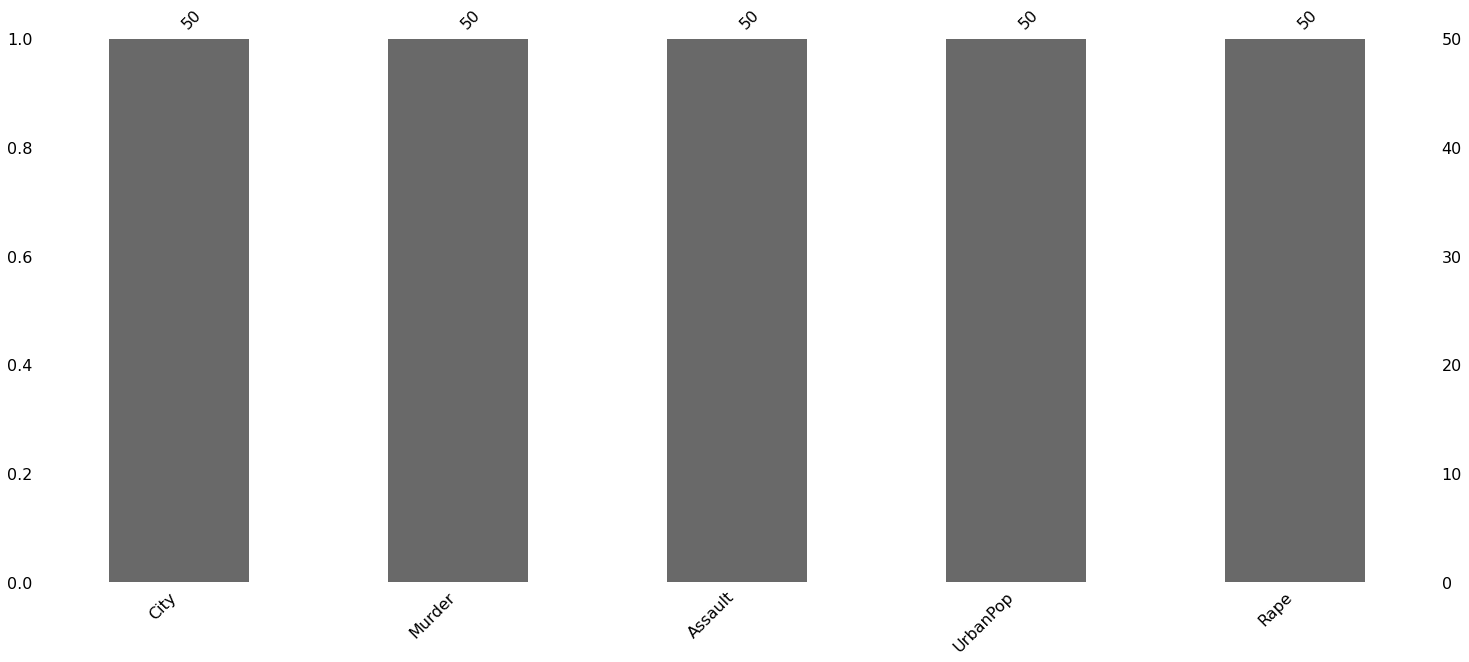

In [5]:
msno.bar(df)

In [6]:
print(df.isna().sum())
print(df.isnull().sum())

City        0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64
City        0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64


In [7]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


### Visualisations

Fortunatly the data didn't require cleansing so i can start with some visualisations to display the data

Below created a histogram for each numerical column:

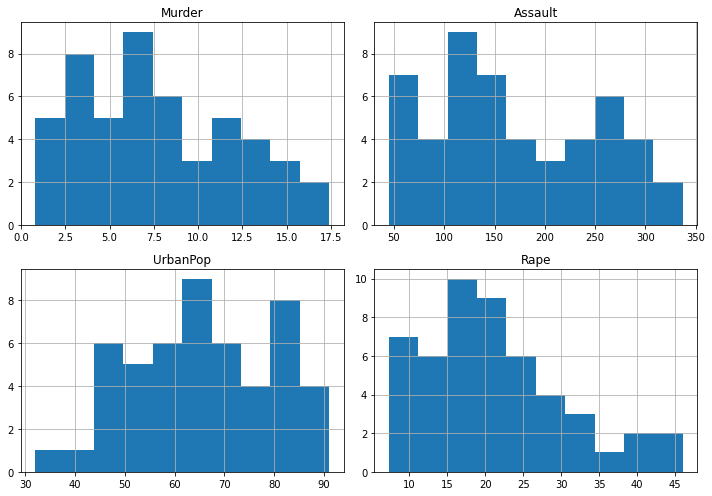

In [8]:
df.hist(bins=10, figsize=(10,7))
plt.tight_layout()
plt.show()

Below is a Scatter matrix for each numerical column

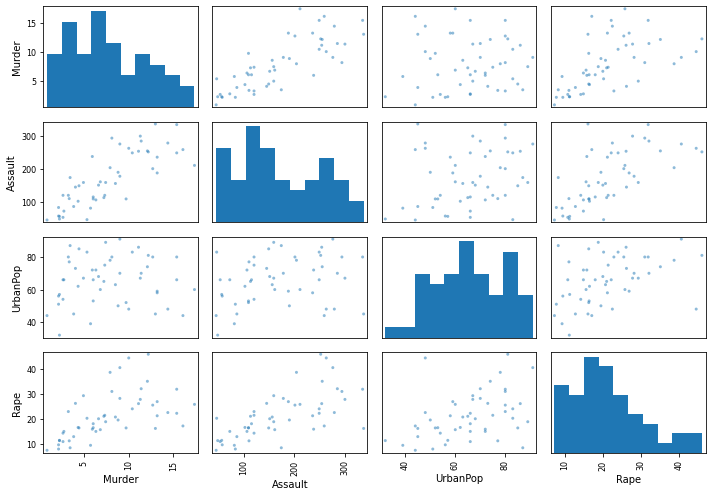

In [9]:
scatter_matrix(df, figsize=(10,7))
plt.tight_layout()
plt.show()

Below is a bar plot depicting the "Cities with the Highest Overall Crime Rate"

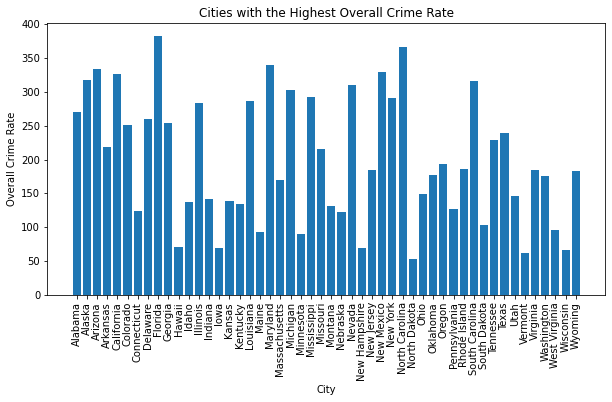

In [10]:
df["OverallCrimeRate"] = df[["Murder", "Assault", "Rape"]].sum(axis=1)
plt.figure(figsize=(10,5))
plt.bar(df["City"], df["OverallCrimeRate"])
plt.xlabel("City")
plt.xticks(df["City"], rotation='vertical')
plt.ylabel("Overall Crime Rate")
plt.title("Cities with the Highest Overall Crime Rate")
plt.show()

Below is a horizontal bar plot depicting "Overall Crime Rate vs. Urban Population"

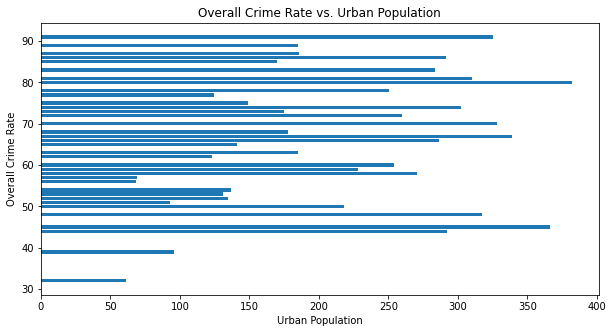

In [11]:
plt.figure(figsize=(10, 5))
plt.barh(df["UrbanPop"], df["OverallCrimeRate"])
plt.xlabel("Urban Population")
plt.ylabel("Overall Crime Rate")
plt.title("Overall Crime Rate vs. Urban Population")
plt.show()

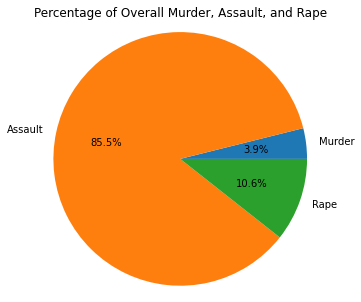

In [12]:
# Calculate the sum of 'Murder', 'Assault', and 'Rape'
total_crimes = df[['Murder', 'Assault', 'Rape']].sum().sum()

# Calculate the percentage of each crime type
df_crimes = df[['Murder', 'Assault', 'Rape']].sum() / total_crimes * 100

# Plot the percentage of each crime type as a pie chart
df_crimes.plot.pie(autopct='%1.1f%%', figsize=(5, 5))
plt.axis('equal')
plt.title('Percentage of Overall Murder, Assault, and Rape')
plt.show()

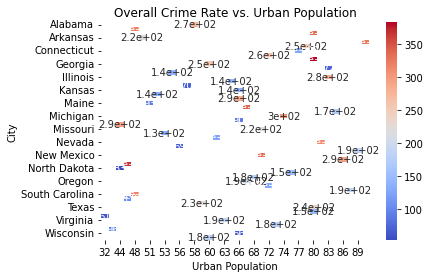

<Figure size 720x360 with 0 Axes>

In [13]:
# Create a pivot table to show the relationship between "UrbanPop" and "OverallCrimeRate"
df_pivot = df.pivot(index='City', columns='UrbanPop', values='OverallCrimeRate')

# Round the numbers in the pivot table to one decimal place
df_pivot = df_pivot.round(1)

# Plot the pivot table as a heat map, using a custom color map that goes from green to red
sns.heatmap(df_pivot, annot=True, cmap="coolwarm", cbar=True)
plt.xlabel('Urban Population')
plt.ylabel('City')
plt.title('Overall Crime Rate vs. Urban Population')
plt.figure(figsize=(10,5))
plt.show()

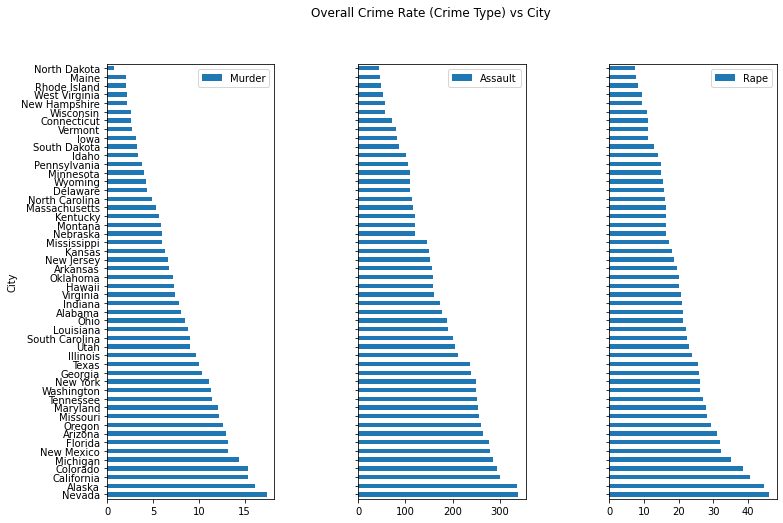

In [27]:
fig, axs = plt.subplots(1, 3, figsize=(12, 8), sharey=True)
df.sort_values(by='Murder', ascending=False).plot.barh(x='City', y='Murder', ax=axs[0])
df.sort_values(by='Assault', ascending=False).plot.barh(x='City', y='Assault', ax=axs[1])
df.sort_values(by='Rape', ascending=False).plot.barh(x='City', y='Rape', ax=axs[2])
fig.suptitle("Overall Crime Rate (Crime Type) vs City")
plt.subplots_adjust(wspace=0.5, hspace=1)
plt.show()
